In [41]:
# So that packages are automatically reloaded if analysis functions need to be updated
%load_ext autoreload
%autoreload 2
# We need to include the module in the path
import pathlib
import sys
import os
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150
# Set up path stuff (to orient the notebook within the package structure)
module_path = pathlib.Path.cwd()
base_dir = module_path.parent.absolute()
model_dir = base_dir / "models" / "trained"
sys.path.append(str(base_dir))
# Now we can import package modules
from src.analysis.analysis_functions import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
print("Loading run data...")
df = get_dataframe(model_dir, taskname="improve_stability_cv")
df = get_runs_data(df)
# Now remove the duplicate columns from - and _ metric naming
df = repair_mixed_metrics(df)

Loading run data...
Reading run info from server
Run 0 of 25 (0.00%)
Run 10 of 25 (40.00%)
Run 20 of 25 (80.00%)
Finished reading run info from server


Now let's see the variation in test_MAP for each of the seperate CV runs

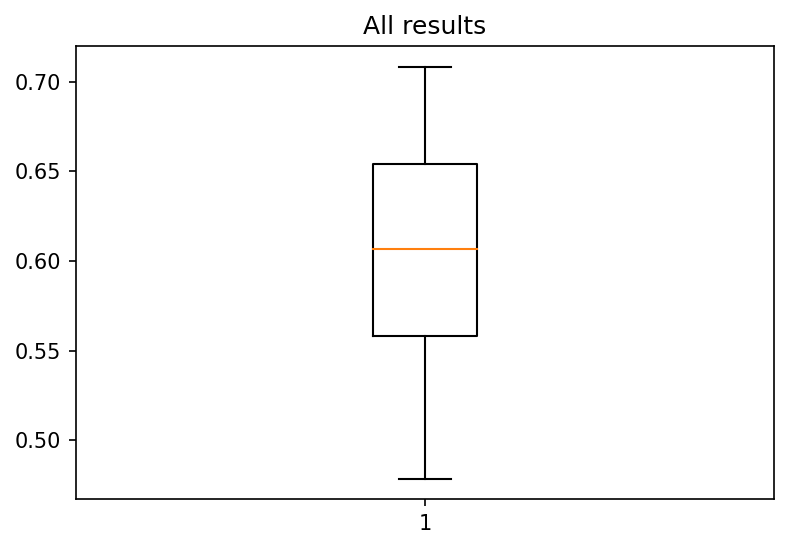

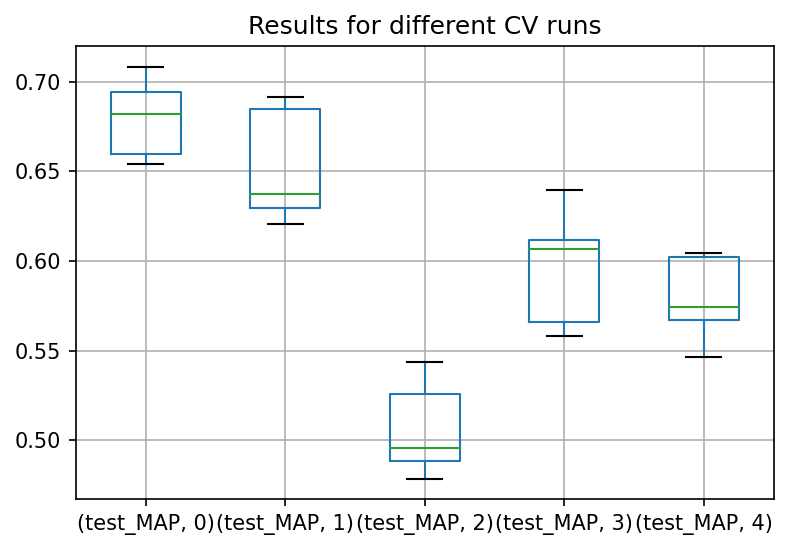

In [80]:
# Change the data file param to make it easier to work with
df[("params", "data_file")] = df[("params", "data_file")].map(str)
cv_nums = df[("params", "data_file")].str.extractall(r"train_(\d+).csv").reset_index()
red_df = df.copy()
red_df[("params", "data_file")] = cv_nums[0]
metric_cols = ["test_MAP"]
param_cols = ["data_file", "seed"]
new_cols = ["data_file", "test_MAP"]
red_df = filter_df(red_df, param_cols, metric_cols)
anal_df = red_df.set_index(param_cols).unstack("data_file")

plt.boxplot(anal_df.values.flatten())
ax = plt.gca()
ax.set_title("All results")
plt.show()
anal_df.boxplot()
ax = plt.gca()
ax.set_title("Results for different CV runs")
plt.show()


We can observe how the validation and test MAP values match in total

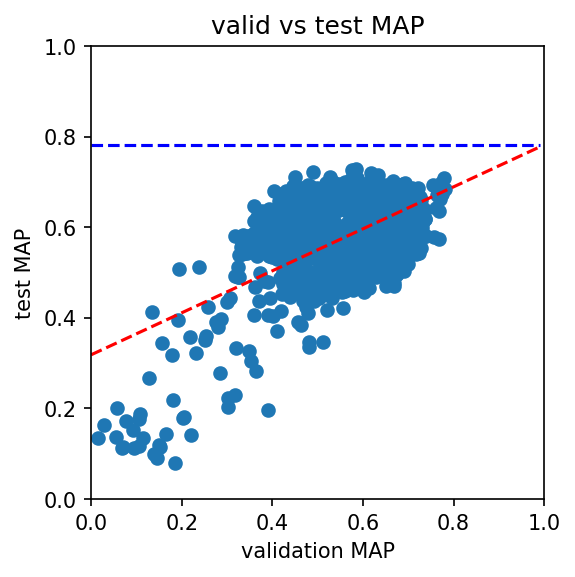

In [84]:
# We need to group all of the different values together here
flat_valid = df["valid_MAP"].to_numpy().flatten()
flat_test = df["test_MAP_step"].to_numpy().flatten()
#Remove NaN values
valid_nan = np.isnan(flat_valid)
test_nan = np.isnan(flat_test)
assert (valid_nan == test_nan).all(), "They should match"
flat_valid = flat_valid[~valid_nan]
flat_test = flat_test[~valid_nan]
#plot
ax = plt.gca()
ax.title.set_text(f"valid vs test MAP")
ax.scatter(flat_valid, flat_test)
ax.set_xlabel("validation MAP")
ax.set_ylabel("test MAP")
ax.axis([0, 1, 0, 1])
ax.set_box_aspect(1)
# Add trendline
z = np.polyfit(flat_valid, flat_test, 1)
p = np.poly1d(z)
xs = np.arange(0,1,0.01)
plt.plot(xs,p(xs),"r--")
plt.plot(xs,[p(1)]*len(xs), "b--")

This is quite difficult to interpret. There is still a reasonably good correlation, but it seems like it is perhaps better at the start of training but then settles to slightly different values (as was seen in the 28_19_21_improve_stability_analysis notebook)

## Individual image analysis
Now we can try to have a look at individual images and how they respond

In [ ]:
# First we need to load the model

# Which model?